<a href="https://colab.research.google.com/github/AlinaSkripets/Project-2/blob/master/Copy_of_DeltaRule.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Training a linear threshold neuron with the delta rule
A neuron is trained to detect images of "two"s using the MNIST dataset.

Imports, plotting inline. 
Supplying seed for pseudorandom number generator makes the numerical experiment reproducible.

In [0]:
import torch 
import torchvision
import numpy as np

import matplotlib.pyplot as plt 

from IPython import display 
import time

%matplotlib inline
plt.rcParams['image.cmap'] = 'gray'
np.random.seed(seed = 485)        # the seed determines the pseudorandom order in which examples are presented to the neuron


Set up training images and labels.<br>
Extract number of training images (60000) and image size (28x28).

In [16]:




mnist_train = torchvision.datasets.MNIST(root='data', train=True, download=True)     # train data only
trainimages = mnist_train.data
trainlabels = mnist_train.targets
(ntrain, nrow, ncol) = trainimages.size()
npix = nrow*ncol 
npix                          # number of pixels in one image

784



**Initialize** the weight vector and bias of the neuron. Set the learning rate hyperparameter.

In [0]:



eta = 0.1  # learning rate parameter
epsinit = 0.1  # initial scale of synaptic weights
w = epsinit*(torch.rand(npix) - 0.5)  # random initialization of weights in [-0.5, 0.5]
b = 0.0    # initialize bias to zero

errcl = torch.zeros(ntrain)    # binary vector indicating error/correct at time t

Function to visualize training (displays the weight vector, input vector, and running average of the classification error).

In [0]:
def visualize(t, errcl, w, x):
    errorrate = np.divide(
        np.cumsum(errcl[range(t)]),
        range(1, t + 1)
    )

    cumloss = np.divide(
        np.cumsum(loss[range(t)]),
        range(1, t + 1)
    )

    display.clear_output(wait = True)

    plt.subplot(1, 4, 1)
    plt.matshow(w.view((28,28)), fignum = False)
    plt.axis('off')
    plt.title("weight vector at t = {:d}".format(t))

    plt.subplot(1, 4, 2)
    plt.matshow(x.view((28,28)), fignum = False)
    plt.axis('off')
    plt.title("input vector")

    plt.subplot(1, 4, 3)
    plt.plot(errorrate, color='red')
    plt.title("average error = {:.4f}".format(errorrate[t-1]))
    plt.ylim(0, 1)
    plt.xlabel('time')
    plt.ylabel('classification error')

    plt.subplot(1, 4, 4)
    plt.plot(cumloss, color='blue')
    plt.title("Cumulative loss = {:.4f}".format(cumloss[t-1]))
    plt.ylim(0, 1)
    plt.xlabel('time')
    plt.ylabel('Loss')



    plt.subplots_adjust(wspace = 0.5)

    plt.gcf().set_size_inches(12, 4)
    display.display(plt.gcf())

One epoch iterating through all training examples in random order.



**The sample code trains an LT neuron to be activated by images of “two” while remaining inactive for images of other digits. When you run the code, you should see time-varying images of the weight vector, and the input vector. You will also see a learning curve, defined as the cumulative time average of the classification error versus time. What is the final value of this time-averaged classification error?**


The final time-avereged classification error is 0.0385. 

**In class we derived the loss function for the LT neuron delta rule. Modify the code so that it additionally plots another learning curve, the cumulative time average of the loss function versus time.**

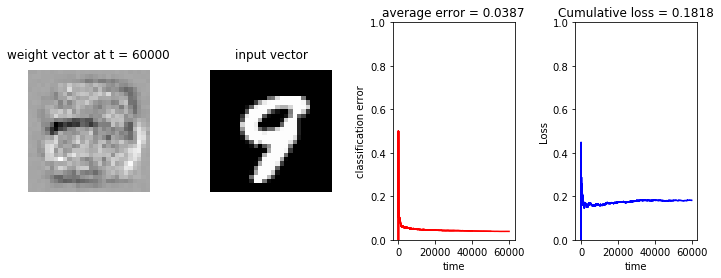

In [19]:
loss = torch.zeros(ntrain)    # loss function

t = 0             # for counting time
tshow = 10000      # how often to visualize
classtodetect = 2 # which digit class to detect
for i in torch.randperm(ntrain):     # iterate over the train steps
    x = trainimages[i].view(-1)                # flatten image
    x = x.float() / 255.0                      # normalize max value to one 
    desired = np.float64(trainlabels[i] == classtodetect)  # get true label as a float
    actual = np.float64(torch.sum(w*x) + b > 0)
    delta = desired - actual
    errcl[t] = abs(desired - actual)           # error between true and predicted
    loss[t] = abs(desired-actual)*abs(torch.sum(w*x))
    t += 1
    w += eta * delta * x                       # weight update
    b += eta * delta                           # bias update
    if t % tshow == 0:    # visualize every tshow steps
        visualize(t, errcl.numpy(), w, x)   
        time.sleep(0.01)

display.clear_output(wait=True)

**After training a model in machine learning, you’ll want to know whether your results are good or bad. It’s often helpful to compare with the performance of simple “baseline” models. For example, a simple baseline here is the trivial recognition algorithm that always returns an output of 0. What would be the classification error for this algorithm?**

In [20]:
error = np.float64(torch.sum(trainlabels == 2))
error/len(trainlabels)

0.0993

The baseline model is the model that predicts every image to not be a 2. Then, we get the error of 0.1986. Our neural net performs much better: only 0.03 error.


The 10000 test examples for use in the homework assignment.

In [21]:
mnist_test = torchvision.datasets.MNIST(root='data', train=False, download=True) # test data only
testimages = mnist_test.data
testlabels = mnist_test.targets
(ntest, nrow, ncol) = testimages.size()
npix = nrow*ncol 
npix      

784



**Compute the classification error in the test set (the last cell of the notebook shows how to set up the test set).**


In [22]:
error = np.float64(torch.sum(testlabels == 2))
error/len(testlabels)

0.1032

In [23]:
t = 0             # for counting time
classtodetect = 2 # which digit class to detect
err = torch.zeros(ntest)


for i in torch.randperm(ntest):     # iterate over the train steps
    x = testimages[i].view(-1)                # flatten image
    x = x.float() / 255.0                      # normalize max value to one 
    desired = np.float64(testlabels[i] == classtodetect)  # get true label as a float
    actual = np.float64(torch.sum(w*x) + b > 0)
    err[i] = abs(desired - actual) 

print(torch.sum(err)/ntest)


tensor(0.0240)


**Train 10 model neurons to detect the 10 digit classes by applying the multiclass softmax algorithm that you derived above. The predicted class can be defined as the neuron for which the softmax output is largest. If the prediction disagrees with the true digit class, that constitutes a classification error. Use torch.nn.Softmax to compute the softmax. 
Your code should plot a learning curve, the cumulative time average of the classification error versus time. What is the final value? Your code should visualize the ten learned weight vectors displayed as images. Add other visualizations that are helpful for monitoring the progress of learning and evaluating the final result.**

The final error value is 0.145. 

In [0]:
mnist_train = torchvision.datasets.MNIST(root='data', train=True, download=True)     # train data only
trainimages = mnist_train.data
trainlabels = mnist_train.targets
(ntrain, nrow, ncol) = trainimages.size()
npix = nrow*ncol 
npix                          # number of pixels in one image

eta = 0.1  # learning rate parameter
epsinit = 0.1  # initial scale of synaptic weights
W = epsinit*(torch.rand([10, npix]) - 0.5)  # random initialization of weights in [-0.5, 0.5]
B = torch.zeros(10)    # initialize bias to zero

errcl = torch.zeros(ntrain)    # binary vector indicating error/correct at time t

In [0]:
def visualize(t, errcl, w, x):
    errorrate = np.divide(
        np.cumsum(errcl[range(t)]),
        range(1, t + 1)
    )

    cumloss = np.divide(
        np.cumsum(loss[range(t)]),
        range(1, t + 1)
    )

    display.clear_output(wait = True)

    plt.subplot(1, 4, 1)
    plt.matshow(w.view((28,28)), fignum = False)
    plt.axis('off')
    plt.title("weight vector at t = {:d}".format(t))

    plt.subplot(1, 4, 2)
    plt.matshow(x.view((28,28)), fignum = False)
    plt.axis('off')
    plt.title("input vector")

    plt.subplot(1, 4, 3)
    plt.plot(errorrate, color='red')
    plt.title("average error = {:.4f}".format(errorrate[t-1]))
    plt.ylim(0, 1)
    plt.xlabel('time')
    plt.ylabel('classification error')

    plt.subplot(1, 4, 4)
    plt.plot(cumloss, color='blue')
    plt.title("Cumulative loss = {:.4f}".format(cumloss[t-1]))
    plt.ylim(0, 3)
    plt.xlabel('time')
    plt.ylabel('Loss')



    plt.subplots_adjust(wspace = 0.5)

    plt.gcf().set_size_inches(12, 4)
    display.display(plt.gcf())

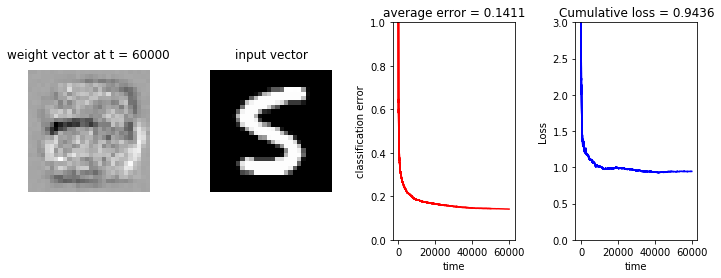

In [38]:
loss = torch.zeros(ntrain)    # loss function
t = 0             # for counting time
tshow = 10000      # how often to visualize
classtodetect = 2 # which digit class to detect
#for i in torch.randperm(ntrain):     # iterate over the train steps
for i in torch.randperm(ntrain):     # iterate over the train steps

    x = trainimages[i].view(-1)                # flatten image
    x = x.float() / 255.0                      # normalize max value to one 
    desired = trainlabels[i]  # get true label as a float

    softmax = torch.nn.Softmax(dim = 0)
    mult = torch.matmul(W, x)+B
    prob = softmax(mult)
    actual = np.float64(torch.argmax(prob))
    errcl[t] = 1-np.float64(desired == actual)           # error between true and predicted
    loss[t] = -torch.log(prob[desired])
    t += 1
    y = torch.zeros(10)
    y[desired] = 1

    step = softmax(mult)-y
    delta = torch.ger(step, x)
    W += -eta*(delta)
    B += -eta * step                           # bias update


    
    if t % tshow == 0:    # visualize every tshow steps
        visualize(t, errcl.numpy(), w, x)
        #print(torch.sum(errcl))  
        #print(torch.sum(loss))    
        time.sleep(0.01)

display.clear_output(wait=True)

In [0]:
def montage(imgstack):
    nimg = len(imgstack)
    width  = int(np.ceil(np.sqrt(nimg)))
    height = int(np.ceil(nimg / width))
    for i in range(nimg):
        ax = plt.subplot(height, width, i+1)
        plt.matshow(imgstack[i],fignum = False)
        plt.axis('off')

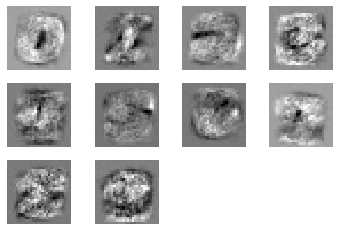

In [40]:
montage(W.view((10,28,28)))

Text(0, 0.5, 'Bias')

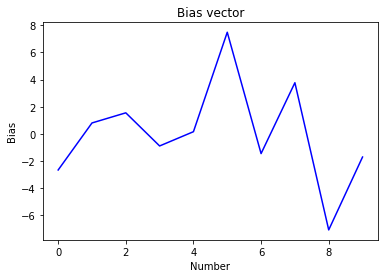

In [46]:
plt.plot(B, color='blue')
plt.title("Bias vector")
plt.xlabel('Number')
plt.ylabel('Bias')

In [43]:
B

tensor([-2.6559,  0.8048,  1.5503, -0.8876,  0.1615,  7.4797, -1.4494,  3.7654,
        -7.0656, -1.7027])